# RANSAC

This script will create a monochrome image (100X50) consisting of a random line and salt-pepper noise
(50, 100, 1)
Plotting a straight line....., 


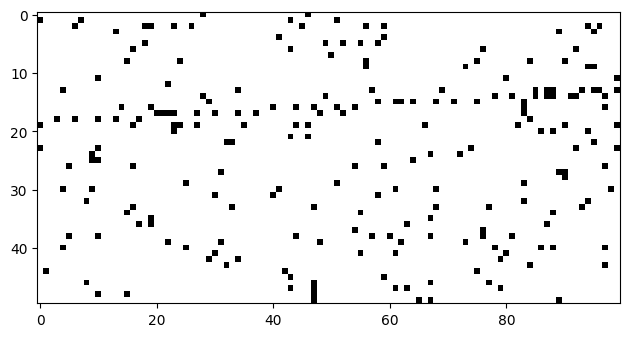

In [25]:
import numpy as np
import os
import skimage
import random

#
#Plots the points on the line starting from start point and leading to end point
#The points are written on to a ndarray that was originally a blank image
#The caller must take responsibility for ensuring that end coordinate values do not exceed the dimensions of the array
#
def plot_line_2darray(np_array,x_start,y_start,x_end,y_end,num_points):
    print(np_array.shape)
    print("Plotting a straight line....., ")
    xvalues = np.linspace(x_start, x_end, num_points)
    yvalues=list()
    slope=(y_end-y_start)/(x_end - x_start)
    for index in range(0,len(xvalues)):
            x=xvalues[index]
            y=slope* (x-x_start) +y_start
            # print("x=%f, y=%f" % (x,y))
            yvalues.append(y)
            np_array[int(y)][int(x)][0]=0
    return np_array


#
#Create blank image
#
img_back_color=255
img_width=100
img_height=50
print("This script will create a monochrome image (100X50) consisting of a random line and salt-pepper noise")
img = np.zeros([img_height,img_width,1],dtype=np.uint8)
img.fill(img_back_color)
#
#Generate Salt-Pepper noise
#
image_noisy=skimage.util.random_noise(img,mode="s&p",rng=None, clip=True,salt_vs_pepper=0.2)
#
#Generate a straight line
#
num_points=30

if (random.randint(0,1) == 0):
    #generate a line starting from a random point at the bottom edge and going up to a random point on the top edge
    start_x=random.random() * (img_width-1)
    start_y=0
    end_x=random.random() * (img_width-1)
    end_y=img_height-1
else:
    #generate a line starting from a random point on the left edge and going up to a random point on the right edge
    start_x=0
    start_y=random.random() * (img_height-1)
    end_x= img_width-1
    end_y=random.random() * (img_height-1)
    
image_with_line=plot_line_2darray(image_noisy,start_x,start_y,end_x,end_y,num_points)
image_result=np.squeeze(image_with_line)
#
#Save the image to disk
#

# folder_script=os.path.abspath('')
# folder_results=os.path.join(folder_script,".out/")
# count_of_files=len(os.listdir(folder_results))

# filename=("NoisyImage%d.png" % count_of_files)
# file_result=os.path.join(folder_script,".out/",filename)

skimage.io.imshow(image_result)
# print("Image saved to fileL%s" % (file_result))
